In [2]:
#Ολές οι βιβλιοθήκες που χρησιμοποιήσαμε στον παρακάτω κώδικα
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
#Φορτώνουμε το αρχείο MNIST απο τα dataset του keras tensorflow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

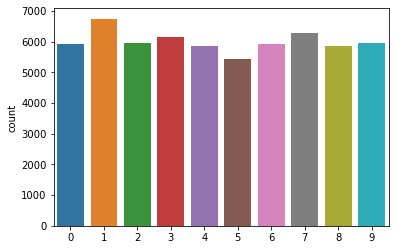

In [4]:
#Μετράμε το συνολικό ανα αριθμό και τα οπτικοποιούμε
sb.countplot(train_labels)
plt.show()

In [5]:
# Χρησιμοποιούμε το
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object

In [5]:
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [7]:
#Μειώνω την διάσταση των numpyarray απο 3 σε 2, ουσιαστικά πολλαπλασιάζω τα pixel 28*28=784
nsamples, nx, ny = train_images.shape
train_images = train_images.reshape((nsamples,nx*ny))
train_images.shape

(60000, 784)

In [8]:
#Μειώνω την διάσταση των numpyarray απο 3 σε 2, ουσιαστικά πολλαπλασιάζω τα pixel 28*28=784
msamples, mx, my = test_images.shape
test_images = test_images.reshape((msamples,mx*my))
test_images.shape

(10000, 784)

In [9]:
grid.fit(train_images, train_labels)
print ("score = %3.2f" %(grid.score(test_images, test_labels)))
print ("best parameters from train data: ", grid.best_params_)

score = 0.98
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [18]:
labels_pred = grid.predict(test_images)

In [19]:
print (labels_pred[100:105])

[6 0 5 4 9]


In [20]:
print (test_labels[100:105])

[6 0 5 4 9]


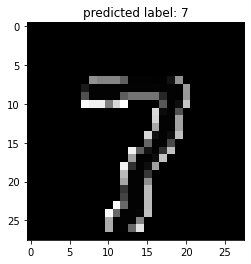

it is an odd number


In [83]:
for i in (np.random.randint(0,10000,1)):
 two_d = (np.reshape(test_images[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(labels_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()
 if labels_pred[i] == [1]:
    print('it is an odd number')
 elif labels_pred[i] == [3]:
    print('it is an odd number')
 elif labels_pred[i] == [5]:
    print('it is an odd number')
 elif labels_pred[i] == [7]:
    print('it is an odd number')
 elif labels_pred[i] == [9]:
    print('it is an odd number')
 else:
    print('it is an even number');

In [100]:
print("confusion matrix: \n ", confusion_matrix(test_labels, labels_pred));

confusion matrix: 
  [[ 970    0    1    1    0    1    4    1    2    0]
 [   0 1130    2    0    1    0    1    0    1    0]
 [   5    0 1009    1    2    0    1    6    8    0]
 [   0    0    2  992    1    3    2    3    6    1]
 [   1    0    3    0  966    0    2    1    2    7]
 [   2    1    2    7    1  866    6    0    5    2]
 [   2    3    1    1    5    6  936    0    4    0]
 [   0    2   10    2    4    1    0  996    2   11]
 [   2    0    4    3    2    5    0    3  949    6]
 [   1    3    1    6   10    5    1    6    7  969]]


In [110]:
accuracy_score(test_labels, labels_pred)

0.9783

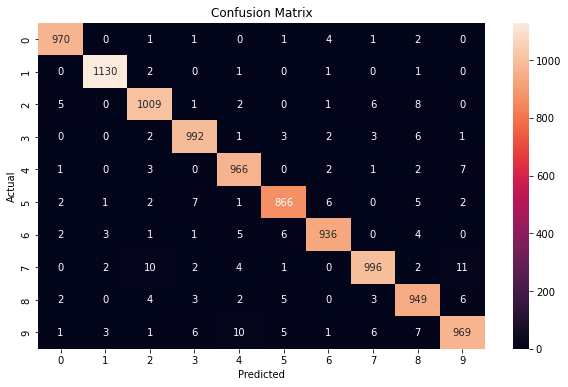

In [128]:
cm = confusion_matrix(test_labels, labels_pred)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Running Linear SVC for multiple cost factor(s) C
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(train_images, train_labels)
    coef = svm.coef_
    
    p_tr = svm.predict(train_images)
    a_tr = accuracy_score(train_labels, p_tr)
    
    pred = svm.predict(test_images)
    a = accuracy_score(test_labels, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)